# HOMEWORK 5

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
import collections

## 1. Data


In [2]:
hero_net  = pd.read_csv('hero-network.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'hero-network.csv'

### 1.2 Data Preprocessing

In [ ]:
hero_net.drop(hero_net[hero_net['hero1'] == hero_net['hero2']].index,inplace=True)

In [ ]:
hero_net.apply(lambda  row :  row['hero1'].rstrip().rstrip('/'),axis=1)

0                LITTLE, ABNER
1                LITTLE, ABNER
2         BLACK PANTHER/T'CHAL
3                LITTLE, ABNER
4                LITTLE, ABNER
                  ...         
574462    COLOSSUS II/PETER RA
574463                CALLISTO
574464                CALLISTO
574465                 CALIBAN
574466    HULK/DR. ROBERT BRUC
Length: 572235, dtype: object

In [ ]:
hero_net.apply(lambda  row :  row['hero2'].rstrip().rstrip('/'),axis=1)

0               PRINCESS ZANDA
1         BLACK PANTHER/T'CHAL
2               PRINCESS ZANDA
3               PRINCESS ZANDA
4         BLACK PANTHER/T'CHAL
                  ...         
574462                CALLISTO
574463                  ROGUE 
574464                 CALIBAN
574465                  ROGUE 
574466       MARKS, DR. SHIELA
Length: 572235, dtype: object

In [ ]:
hero_net['hero1'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero1'] == 'SPIDER-MAN/PETER PAR') else row['hero1'],axis=1)

In [ ]:
hero_net['hero2'] = hero_net.apply(lambda row :  'SPIDER-MAN/PETER PARKER' if(row['hero2'] == 'SPIDER-MAN/PETER PAR') else row['hero2'],axis=1)

In [ ]:
len(hero_net[hero_net['hero2'] =='SPIDER-MAN/PETER PAR' ])

0

In [ ]:
hero_net.to_csv('hero.csv',index=False)

### First Graph

In [ ]:
hero_net.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [ ]:
len(hero_net)

572235

In [ ]:
new = hero_net.groupby(['hero1','hero2']).hero2.count().reset_index(name="count") 

In [ ]:
new.head()

,hero1,hero2,count
0,24-HOUR MAN/EMMANUEL,"FROST, CARMILLA",1
1,24-HOUR MAN/EMMANUEL,KILLRAVEN/JONATHAN R,1
2,24-HOUR MAN/EMMANUEL,M'SHULLA,1
3,3-D MAN/CHARLES CHAN,ANGEL/WARREN KENNETH,1
4,3-D MAN/CHARLES CHAN,ANT-MAN II/SCOTT HAR,1


In [ ]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224169 entries, 0 to 224168
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   hero1   224169 non-null  object
 1   hero2   224169 non-null  object
 2   count   224169 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [ ]:
G1 = nx.Graph()

In [ ]:
new.apply(lambda row :  G1.add_edge(row['hero1'],row['hero2'],weight=1/row['count']),axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
224164    None
224165    None
224166    None
224167    None
224168    None
Length: 224169, dtype: object

In [ ]:
nx.info(G1)

/tmp/ipykernel_18650/968434106.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G1)


'Graph with 6426 nodes and 167207 edges'

### Second Graph

In [ ]:
nodes  = pd.read_csv('nodes.csv')

In [ ]:
edges  =pd.read_csv('edges.csv')

In [ ]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [ ]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [ ]:
G2 = nx.Graph()

In [ ]:
nodes.apply(lambda row :  G2.add_node(row['node'],type = row['type']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
19085    None
19086    None
19087    None
19088    None
19089    None
Length: 19090, dtype: object

In [ ]:
edges.apply(lambda row :  G2.add_edge(row['hero'],row['comic']),axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
96099    None
96100    None
96101    None
96102    None
96103    None
Length: 96104, dtype: object

In [ ]:
nx.info(G2)

/tmp/ipykernel_18650/1976782796.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G2)


'Graph with 19091 nodes and 96104 edges'

In [ ]:
attrs  ={'SPIDER-MAN/PETER PARKER':{'type' : 'hero'}}

In [ ]:
nx.set_node_attributes(G2,attrs)

In [ ]:
G2.nodes['SPIDER-MAN/PETER PARKER']

{'type': 'hero'}

In [ ]:
len(edges)

96104

In [ ]:
len(G2.nodes)

19091

## 2. Backend Implementation

**Top N heroes:** The top N heroes who have appeared in the most number of comics. The 'edges.csv' file, which represents the comics in which each hero has appeared, can be used to filter these N heroes.

In [249]:
N = 20

In [250]:
appearances = {node:G2.degree(node) for node in G2.nodes if G2.nodes[node]['type'] == 'hero'}

In [251]:
collab  = collections.Counter(appearances).most_common(N)

In [252]:
collab  ={x:v for x,v in collab}

In [253]:
top_N_heroes  =list(collab.keys())

In [255]:
black_list =  [ node for node in list(G1.nodes()) if node not in top_N_heroes]

In [256]:
len(black_list)

6346

### Functionality 1 -  extract the graph's features


In [178]:
def get_graph_features(graph,graph_type):
    features = {}
    n_nodes  = nx.number_of_nodes(graph)
    features['number_of_nodes']  = n_nodes
    density  = nx.density(graph)
    features['density']  = density
    degree_sequence = sorted((d for n,d in graph.degree()),reverse=True)
    degrees =  np.array(degree_sequence)
    percentile  = np.percentile(degrees,95)
    if(graph_type==1):
        collaborations  = { node : graph.degree(node)  for node in graph.nodes()}
        features['collaborations']  = collaborations 
        features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile ]
    else:
       appearances=  {node  : graph.degree(node) for node in graph.nodes if graph.nodes[node]['type'] == 'comic' }
       features['appearances']  = appearances
       features['hubs']  = [ node for node in graph.nodes() if graph.degree(node) > percentile and graph.nodes[node]['type'] == 'comic']
    features['degree_dist']  = degree_sequence
    features['average_degree']  = round(sum(degree_sequence)/len(degree_sequence))
    n  = len(graph.nodes())
    if( (n*(n-1))/2 - len(graph.edges()) < ((n*n-1)/2)/1000):
        is_dense = True
    else:
        is_dense  = False
    features['is_dense']  = is_dense
    return features

In [257]:

G1.remove_nodes_from(black_list)
G1_features  =get_graph_features(G1,1)

In [258]:

G2_features  = get_graph_features(G2,2)

## 3. Frontend Visualization

### Visualization 1 - Visualize some features of the network

In [264]:
def visualize_features(features,graph_type):
    #First Features table
    table  = '| Feature | Values |\n'
    table += '| ------- | ------- |\n'
    table += '| Number_of_nodes |'+ str(features['number_of_nodes'])+'|\n'
    table += '| Density |'+ str(round(float(features['density']),4))+'|\n'
    table += '| Average_degree |'+ str(features['average_degree'])+'|\n'
    table += '| Is_dense |'+ str(features['is_dense'])+'|\n'
    display(Markdown(table))
    #Hubs table
    table = '| Hubs |\n'
    table += '|-----|\n'
    for node in features['hubs'][:20]:
        table+='|'+str(node)+'|\n'
    table+='|... '+str(len(features['hubs']))+' total hubs |'
    display(Markdown(table))

    if(graph_type==1):
        #plot of Number of collaborations of each hero in descending order
        collab  = {k:v for k,v in sorted(features['collaborations'].items(), key =  lambda item : item[1],reverse=True)}
        plt.figure(figsize=(30, 6), dpi=100)
        plt.title('Number of collaborations of each hero in descending order')
        plt.bar(collab.keys(),collab.values())
        plt.show()
    else:
        #plot of Number of heroes who appeared in each comic, sorted in descending order only first 50
        apps = {k:v for k,v in sorted(list(features['appearances'].items())[:50], key=lambda item:item[1],reverse=True)}
        plt.figure(figsize=(30, 6), dpi=80)
        plt.title('Number of heroes who appeared in each comic, sorted in descending order')
        plt.bar(apps.keys(),apps.values())
        plt.show()

            

#### Visualize First Graph features
Only for the top N heroes  who have appereade in most number of comics

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |80|
| Density |0.7658|
| Average_degree |60|
| Is_dense |False|


| Hubs |
|-----|
|CAPTAIN AMERICA|
|CYCLOPS/SCOTT SUMMER|
|MR. FANTASTIC/REED R|
|HUMAN TORCH/JOHNNY S|
|... 4 total hubs |

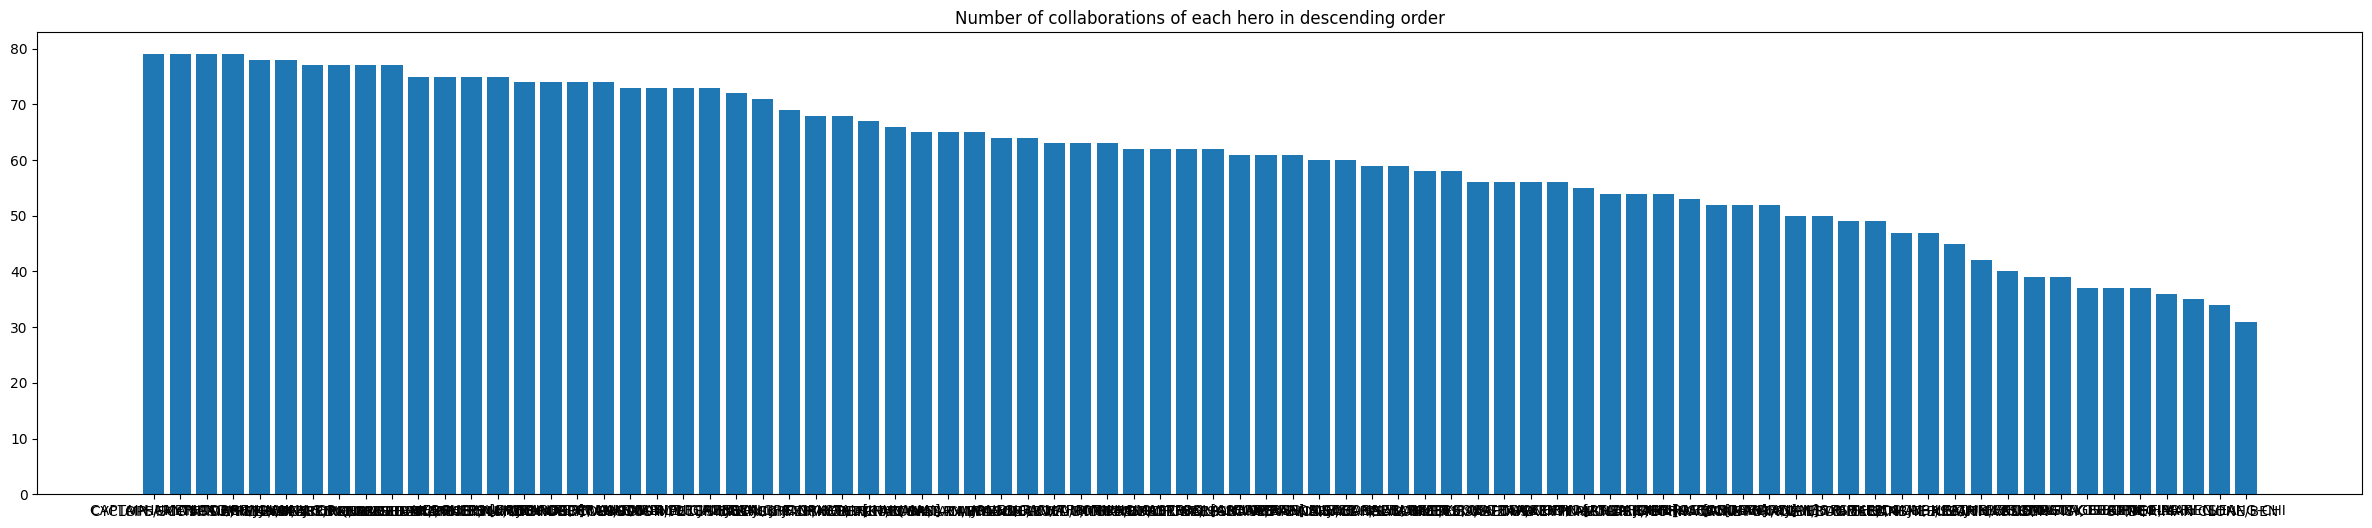

In [265]:
visualize_features(G1_features,1)

#### Visualize Second Graph features

| Feature | Values |
| ------- | ------- |
| Number_of_nodes |19091|
| Density |0.0005|
| Average_degree |10|
| Is_dense |False|


| Hubs |
|-----|
|A 10|
|A 118|
|A 12|
|A 15|
|A 16|
|A 173|
|A 188|
|A 18|
|A 19|
|A 1|
|A 21|
|A 305|
|A 310|
|A3 10|
|A3 11|
|A3 1|
|A 329|
|A3 2|
|A 332|
|A3 32|
|... 257 total hubs |

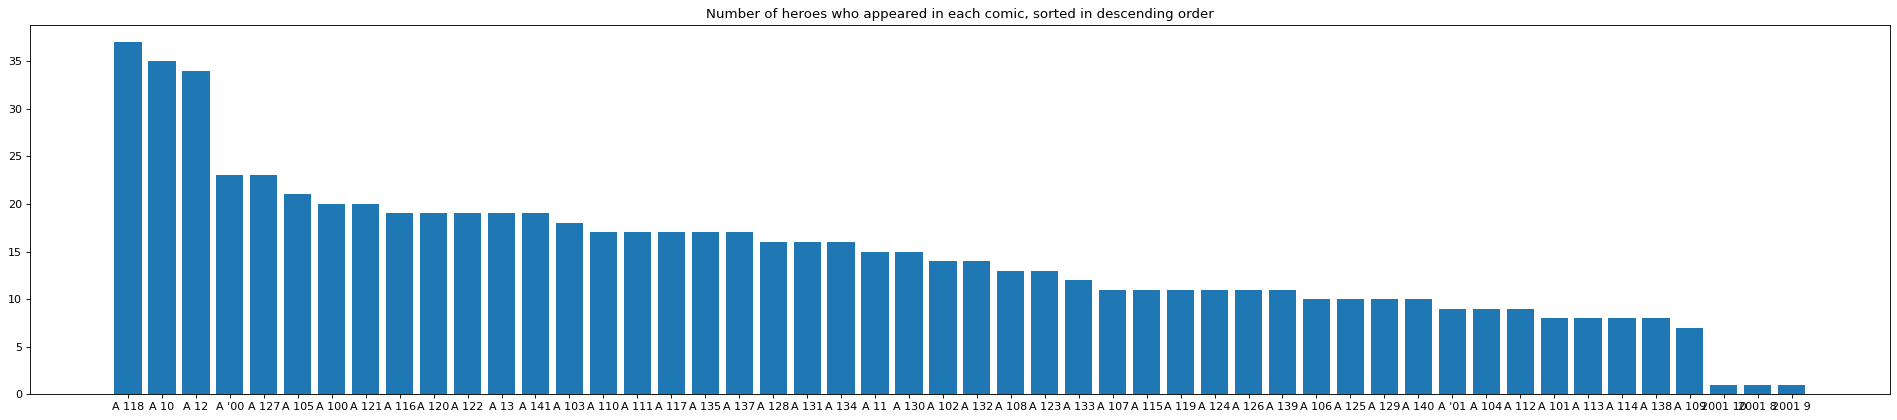

In [266]:
visualize_features(G2_features,2)

## 6. Algorithmic Question

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Grid implementation as a networkx graph
The grid 3x3 will be implemented by an undirected graph, with 9 nodes. An edge will lie between the nodes only if they are adjicient in all directions without the diagonal ones. There will be an edge also if the nodes are not adjacient but are on the same orizontal or vertical line in the grid. So in total it will have 18 edges for example if node 1 is the top left corner in the grid it will have 4 edges:
(1,2),(1,3),(1,4),(1,7).

In [96]:
grid  = nx.Graph()
nodes= [ node for node in range(1,10) ]
pos = {}
coord = [(x,y) for x in range(3) for y in range(3)]
for i in range(9):
    pos[i+1]  = coord[i]

In [97]:

list(map(lambda node : grid.add_node(node,pos=pos[node]),nodes))

[None, None, None, None, None, None, None, None, None]

#### Add all the edges

In [98]:
grid.add_edge(1,2)
grid.add_edge(1,3)
grid.add_edge(1,4)
grid.add_edge(2,3)
grid.add_edge(2,5)
grid.add_edge(3,6)
grid.add_edge(4,6)
grid.add_edge(4,5)
grid.add_edge(4,7)
grid.add_edge(5,8)
grid.add_edge(5,6)
grid.add_edge(6,9)
grid.add_edge(7,8)
grid.add_edge(7,9)
grid.add_edge(8,9)
grid.add_edge(1,7)
grid.add_edge(2,8)
grid.add_edge(3,9)


#### Grid

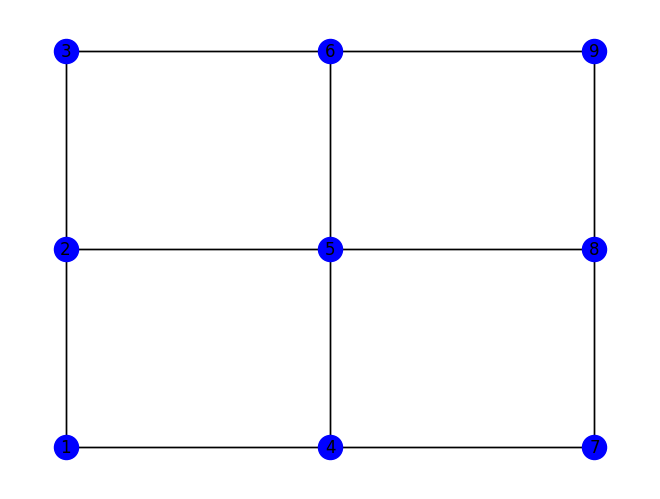

In [99]:

nx.draw(grid, pos=pos, 
        node_color='blue', 
        with_labels=True)

#### Add 'passed' and 'moves' attributes to each edges

__'passed'__  : attribute with the nodes the pattern will cross when choosing an edge as the next move.\
example  : the edge that lies between 1 and 3 will create a pattern that crosses the node 2\
__'moves'__ :  since is an undirected graph every edge as two possible moves depending on the starting node.\
example :  the edge that lies between 1 and 2 represents two possible moves -> 1 R 2 or 2 L 1

In [100]:
grid.edges[(1,2)]['passed']  = []
grid.edges[(1,3)]['passed']  = [2]
grid.edges[(1,4)]['passed'] = []
grid.edges[(2,3)]['passed']  = []
grid.edges[(2,5)]['passed'] = []
grid.edges[(5,6)]['passed']  =[]
grid.edges[(3,6)]['passed'] = []
grid.edges[(4,6)]['passed']  = [5]
grid.edges[(4,5)]['passed']  = []
grid.edges[(4,7)]['passed'] = []
grid.edges[(5,8)]['passed'] = []
grid.edges[(6,9)]['passed'] = []
grid.edges[(7,8)]['passed']  = []
grid.edges[(7,9)]['passed']  = [8]
grid.edges[(8,9)]['passed']  = []
grid.edges[(1,7)]['passed'] = [4]
grid.edges[(2,8)]['passed']= [5]
grid.edges[(3,9)]['passed']= [6]


In [101]:
grid.edges[(1,2)]['moves']  = ['1R','2L']
grid.edges[(1,3)]['moves']  = ['1R','3L']
grid.edges[(1,4)]['moves'] = ['4U','1D']
grid.edges[(2,3)]['moves']  = ['2R','3L']
grid.edges[(2,5)]['moves'] = ['5U','2D']
grid.edges[(5,6)]['moves'] = ['5R','6L']

grid.edges[(3,6)]['moves'] = ['6U','3D']
grid.edges[(4,6)]['moves']  = ['4R','6L']
grid.edges[(4,5)]['moves']  = ['5L','4R']
grid.edges[(4,7)]['moves'] = ['7U','4D']
grid.edges[(5,8)]['moves'] = ['8U','5D']

grid.edges[(6,9)]['moves'] = ['9U','6D']
grid.edges[(7,8)]['moves']  = ['7R','8L']
grid.edges[(7,9)]['moves']  = ['7R','9L']
grid.edges[(8,9)]['moves']  = ['8R','9L']
grid.edges[(1,7)]['moves'] = ['1D','7U']
grid.edges[(2,8)]['moves']= ['2D','8U']
grid.edges[(3,9)]['moves']= ['3D','9U']


#### Function that counts the number of patterns created by the moves given as input starting from the node current.


In [102]:
def check_path_from(map,current,visited,moves):
    if moves == '':
        return 1
    else:
        next   = moves[1:]
        partial = 0
        for edge in map.edges(current):
            data =  map.get_edge_data(*edge)
            if(edge[1] == current):
                in_n = edge[0]
            else:
                in_n = edge[1]
            if( (str(current)+ moves[0]) in data['moves'] and in_n  not in visited):
                update = visited[:]
                if(edge[0]==current):
                    if( edge[1] not in update):
                        update.append(edge[1])
                        if(data['passed'] != []):
                            update.append(*data['passed'])
                        partial += check_path_from(map,edge[1],update,next)
                else:
                    if( edge[0] not in update):
                        update.append(edge[0])
                        if(data['passed'] != []):
                            update.append(*data['passed'])
                        partial += check_path_from(map,edge[0],update,next)
        return partial

### Counts all the possible patterns inside the given grid

In [103]:
def count_patterns(grid,moves):
    print(moves)
    cnt = 0
    for node in grid.nodes():
        visited = [node]
        cnt += check_path_from(grid,node,visited,moves)
    return cnt


### Input 1

__moves__ : 'DRU'

### Output 1

Expected output : 15

In [104]:
count_patterns(grid,'DRU')

DRU


15

### Input 2

___moves__  : 'R'

### Output 2

Expected output : 9

In [105]:
count_patterns(grid,'R')

R


9

### Input 3

___moves__  : 'LDRDRUL'

### Output 3

Expected output : 0

In [106]:
count_patterns(grid,'LDRDRUL')

LDRDRUL


0